# Singular values and conditioning


In this lecture we discuss matrix and vector norms. The matrix $2$-norm involves
_singular values_, which are a measure of how matrices "stretch" vectors. 
We also introduce show that
the singular values of a matrix give a notion of a _condition number_, which allows us
to bound errors introduced by floating point numbers in linear algebra operations.

1. Vector norms: we discuss the standard $p$-norm for vectors in $ℝ^n$.
2. Matrix norms: we discuss how two vector norms can be used to induce a norm on matrices. These
satisfy an additional multiplicative inequality.
3. Singular value decomposition: we introduce the singular value decomposition which is related to
the matrix $2$-norm and best low rank approximation.
4. Condition numbers: we will see how errors in matrix-vector multiplication and solving linear systems
can be bounded in terms of the _condition number_, which is defined in terms of singular values.

In [1]:
using LinearAlgebra, Plots

## 1. Vector norms

Recall the definition of a (vector-)norm:

**Definition (vector-norm)** A norm $\|\cdot\|$ on $ℝ^n$ is a function that satisfies the following, for $𝐱,𝐲 ∈ ℝ^n$ and
$c ∈ ℝ$:
1. Triangle inequality: $\|𝐱 + 𝐲 \| ≤ \|𝐱\| + \|𝐲\|$
2. Homogeneneity: $\| c 𝐱 \| = |c| \| 𝐱 \|$
3. Positive-definiteness: $\|𝐱\| = 0$ implies that $𝐱 = 0$.


Consider the following example:

**Definition (p-norm)**
For $1 ≤ p < ∞$ and $𝐱 \in ℝ^n$, define the $p$-norm:
$$
\|𝐱\|_p := \left(\sum_{k=1}^n |x_k|^p\right)^{1/p}
$$
where $x_k$ is the $k$-th entry of $𝐱$. 
For $p = ∞$ we define
$$
\|𝐱\|_∞ := \max_k |x_k|
$$

**Theorem (p-norm)** $\| ⋅ \|_p$ is a norm for $1 ≤ p ≤ ∞$.

**Proof**

We will only prove the case $p = 1, 2, ∞$ as general $p$ is more involved.

Homogeneity and positive-definiteness are straightforward: e.g.,
$$
\|c 𝐱\|_p = (\sum_{k=1}^n |cx_k|^p)^{1/p} = (|c|^p \sum_{k=1}^n |x_k|^p)^{1/p} = |c| \| 𝐱 \|
$$
and if $\| 𝐱 \|_p = 0$ then all $|x_k|^p$ are have to be zero.

For $p = 1,∞$ the triangle inequality is also straightforward:
$$
\| 𝐱 + 𝐲 \|_∞ = \max_k (|x_k + y_k|) ≤ \max_k (|x_k| + |y_k|) ≤ \|𝐱\|_∞ + \|𝐲\|_∞
$$
and
$$
\| 𝐱 + 𝐲 \|_1 = \sum_{k=1}^n |x_k + y_k| ≤  \sum_{k=1}^n (|x_k| + |y_k|) = \| 𝐱 \|_1 + \| 𝐲\|_1
$$

For $p = 2$ it can be proved using the Cauchy–Schwartz inequality:
$$
|𝐱^⊤ 𝐲| ≤ \| 𝐱 \|_2 \| 𝐲 \|_2
$$
That is, we have
$$
\| 𝐱 + 𝐲 \|^2 = \|𝐱\|^2 + 2 𝐱^⊤ 𝐲 + \|𝐲\|^2 ≤ \|𝐱\|^2 + 2\| 𝐱 \| \| 𝐲 \| + \|𝐲\|^2 = (\| 𝐱 \| +  \| 𝐲 \|)
$$


∎


 In Julia can use the inbuilt `norm` function to calculate norms:
 ```julia
 norm([1,-2,3]) == norm([1,-2,3], 2) == sqrt(1^2 + 2^2 + 3^2);
 norm([1,-2,3], 1) == sqrt(1 + 2 + 3);
 norm([1,-2,3], Inf) == 3;
 ```


## 2. Matrix norms
 Just like vectors, matrices have norms that measure their "length".  The simplest example is the Fröbenius norm, 
 defined for an $m \times n$ real matrix $A$ as
$$
\|A\|_F := \sqrt{\sum_{k=1}^m \sum_{j=1}^n A_{kj}^2}
$$
This is available as `norm` in Julia:

In [2]:
A = randn(5,3)
norm(A) == norm(vec(A))

true

While this is the simplest norm, it is not the most useful.  Instead, we will build a matrix norm from a 
vector norm:



**Definition (matrix-norm)** Suppose $A ∈ ℝ^{m × n}$  and consider two norms $\| ⋅ \|_X$ on $ℝ^n$  and 
$\| ⋅ \|_Y$ on $ℝ^n$. Define the _(induced) matrix norm_ as:
$$
\|A \|_{X → Y} := \sup_{𝐯 : \|𝐯\|_X=1} \|A 𝐯\|_Y
$$
Also define
$$
\|A\|_X \triangleq \|A\|_{X \rightarrow X}
$$

For  the induced 2, 1, and $∞$-norm we use
$$
\|A\|_2, \|A\|_1 \qquad \hbox{and} \qquad \|A\|_∞.
$$

Note an equivalent definition of the induced norm:
$$
\|A\|_{X → Y} = \sup_{𝐱 ∈ ℝ^n, 𝐱 ≠ 0} {\|A 𝐱\|_Y \over \| 𝐱\|_X}
$$
This follows since we can scale $𝐱$ by its norm so that it has unit norm, that is,
${𝐱} \over \|𝐱\|_X$ has unit norm.

**Lemma (matrix norms are norms)** Induced matrix norms are norms, that is for $\| ⋅ \| = \| ⋅ \|_{X → Y}$ we have:
1. Triangle inequality: $\| A + B \| ≤  \|A\| + \|B\|$
1. Homogeneneity: $\|c A \| = |c| \|A\|$
3. Positive-definiteness: $\|A\| =0 \Rightarrow A = 0$
In addition, they satisfy the following additional propertie:
1. $\|A 𝐱 \|_Y ≤ \|A\|_{X → Y} \|𝐱 \|_X$
2. Multiplicative inequality: $\| AB\|_{X → Z} ≤ \|A \|_{Y → Z} \|B\|_{X →  Y}$

**Proof**

First we show the _triangle inequality_:
$$
\|A + B \| ≤ \sup_{𝐯 : \|𝐯\|_X=1} (\|A 𝐯\|_Y + \|B 𝐯\|_Y) ≤ \| A \| + \|B \|.
$$
Homogeneity is also immediate. Positive-definiteness follows from the fact that if
$\|A\| = 0$ then $A 𝐱  = 0$ for all $𝐱 ∈ ℝ^n$.
The property $\|A 𝐱 \|_Y ≤ \|A\|_{X → Y} \|𝐱 \|_X$ follows from the definition. Finally, 
Finally, the multiplicative inequality follows from
$$
\|A B\| = \sup_{𝐯 : \|𝐯\|_X=1} \|A B 𝐯 |_Z ≤ \sup_{𝐯 : \|𝐯\|_X=1} \|A\|_{Y → Z} \| B 𝐯 | = \|A \|_{Y → Z} \|B\|_{X →  Y}
$$



∎

We have some simple examples of induced norms:

**Example ($1$-norm)** We claim 
$$
\|A \|_1 = \max_j \|𝐚_j\|_1
$$
that is, the maximum $1$-norm of the columns. To see this use the triangle inequality to
find for $\|𝐱\|_1 = 1$
$$
\| A 𝐱 \|_1 ≤ ∑_{j = 1}^n |x_j| \| 𝐚_j\|_1 ≤ \max_j \| 𝐚_j\| ∑_{j = 1}^n |x_j| = \max_j \| 𝐚_j\|_1.
$$
But the bound is also attained since if $j$ is the column that maximises the norms then
$$
\|A 𝐞_j \|_1 = \|𝐚_j\|_1 =  \max_j \| 𝐚_j\|_1.
$$

In the problem sheet we see that
$$
\|A\|_∞ = \max_k \|A[k,:]\|_1
$$
that is, the maximum $1$-norm of the rows.

Matrix norms are available via `opnorm`:

In [3]:
m,n = 5,3
A = randn(m,n)
opnorm(A,1) == maximum(norm(A[:,j],1) for j = 1:n)
opnorm(A,Inf) == maximum(norm(A[k,:],1) for k = 1:m)
opnorm(A) # the 2-norm

1.496138957262776

An example that does not have a simple formula is $\|A \|_2$, but we do have two simple cases:

**Proposition (diagonal/orthogonal 2-norms)** If $Λ$ is diagonal with entries $λ_k$ then
$\|Λ\|_2 = \max_k |λ_k|.$. If $Q$ is orthogonal then $\|Q\| = 1$.


## 3. Singular value decomposition

To define the induced $2$-norm we need to consider the following:

**Definition (singular value decomposition)** For $A ∈ ℝ^{m × n}$ with rank $r > 0$, 
the _reduced singular value decomposition (SVD)_ is
$$
A = U Σ V^⊤
$$
where $U ∈ ℝ^{m × r}$ and $V ∈  ℝ^{r × n}$ have orthonormal columns and $Σ ∈ ℝ^{r × r}$ is  diagonal whose
diagonal entries, which which we call _singular values_, are all positive and decreasing: $σ_1 ≥ ⋯ ≥ σ_r > 0$.
The _full singular value decomposition (SVD)_ is
$$
A = Ũ Σ̃ Ṽ^⊤
$$
where $Ũ ∈ ℝ^{m × m}$ and $Ṽ ∈  ℝ^{n × n}$ are orthogonal matrices and $Σ̃ ∈ ℝ^{m × n}$ has only
diagonal entries, i.e., if $m > n$,
$$
Σ̃ = \begin{bmatrix} σ_1 \\ & ⋱ \\ && σ_n \\ && 0 \\ && ⋮ \\ && 0 \end{bmatrix}
$$
and if $m < n,
$$
Σ̃ = \begin{bmatrix} σ_1 \\ & ⋱ \\ && σ_m & 0 & ⋯ & 0\end{bmatrix}
$$
where $σ_k = 0$ if $k > r$.

To show the SVD exists we first establish some properties of a _Gram matrix_ ($A^⊤A$):

**Proposition (Gram matrix kernel)** The kernel of $A$ is the also the kernel of $A^⊤ A$. 

**Proof**
If $A^⊤ A 𝐱 = 0$ then we have
$$
0 = 𝐱 A^⊤ A 𝐱 = \| A 𝐱 \|^2
$$
which means $A 𝐱 = 0$ and $𝐱 ∈ \hbox{ker}(A)$.
∎

**Proposition (Gram matrix diagonalisation)** The Gram-matrix
satisfies
$$
A^⊤ A = Q Λ Q^⊤
$$
where $Q$ is orthogonal and the eigenvalues $λ_k$ are non-negative.

**Proof**
$A^⊤ A$ is symmetric so we appeal to the spectral theorem for the
existence of the decomposition.
For the corresponding (orthonormal) eigenvector $𝐪_k$,
$$
λ_k = λ_k 𝐪_k^⊤ 𝐪_k = 𝐪_k^⊤ A^⊤ A 𝐪_k = \| A 𝐪_k \| ≥ 0.
$$

∎


This connection allows us to prove existence:

**Theorem (SVD existence)** Every $A ∈ ℝ^{m × n}$ has an SVD.

**Proof**
Consider
$$
A^⊤ A = Q Λ Q^⊤.
$$
Assume (as usual) that the eigenvalues are sorted in decreasing modulus, and so $λ_1,…,λ_r$
are an enumeration of the non-zero eigenvalues and
$$
V := \begin{bmatrix} 𝐪_1 | ⋯ | 𝐪_r \end{bmatrix}
$$
the corresponding (orthonormal) eigenvectors, with
$$
K = \begin{bmatrix} 𝐪_{r+1} | ⋯ | 𝐪_n \end{bmatrix}
$$
the corresponding kernel. 
Define
$$
Σ :=  \begin{bmatrix} \sqrt{λ_1} \\ & ⋱ \\ && \sqrt{λ_r} \end{bmatrix}
$$
Now define
$$
U := AV Σ^{-1}
$$
which is orthogonal since $A^⊤ A V = V Σ^2 $:
$$
U^⊤ U = Σ^{-1} V^⊤ A^⊤ A V Σ^{-1} = I.
$$
Thus we have
$$
U Σ V^⊤ = A V V^⊤ = A \underbrace{\begin{bmatrix} V | K \end{bmatrix}}_Q\underbrace{\begin{bmatrix} V^⊤ \\ K^⊤ \end{bmatrix}}_{Q^⊤}
$$
where we use the fact that $A K = 0$ so that concatenating $K$ does not change the value.

∎

Singular values tell us the 2-norm:

**Corollary (singular values and norm)**
$$
\|A \|_2 = σ_1
$$
and if $A ∈ ℝ^{n × n}$ is invertible, then
$$
\|A^{-1} \|_2 = σ_n^{-1}
$$

**Proof**

First we establish the upper-bound:
$$
\|A \|_2 ≤  \|U \|_2 \| Σ \|_2 \| V^⊤\|_2 = \| Σ \|_2  = σ_1
$$
This is attained using the first right singular vector:
$$
\|A 𝐯_1\|_2 = \|Σ V^⊤ 𝐯_1\|_2 = \|Σ  𝐞_1\|_2 = σ_1
$$
The inverse result follows since the inverse has SVD
$$
A^{-1} = V Σ^{-1} U^⊤ = V (W Σ^{-1} W) U^⊤
$$
is the SVD of $A^{-1}$, where
$$
W := P_σ = \begin{bmatrix} && 1 \\ & ⋰ \\ 1 \end{bmatrix}
$$
is the permutation that reverses the entries, that is, $σ$ has Cauchy notation
$$
\begin{pmatrix}
1 & 2 & ⋯ & n \\
n & n-1 & ⋯ & 1
\end{pmatrix}.
$$


∎

We will not discuss in this module computation of singular value decompositions or eigenvalues:
they involve iterative algorithms (actually built on a sequence of QR decompositions).

One of the main usages for SVDs is low-rank approximation:

**Theorem (best low rank approximation)** The  matrix
$$
A_k := \begin{bmatrix} 𝐮_1 | ⋯ | 𝐮_k \end{bmatrix} \begin{bmatrix}
σ_1 \\
& ⋱ \\
&& σ_k\end{bmatrix} \begin{bmatrix} 𝐯_1 | ⋯ | 𝐯_k \end{bmatrix}^⊤
$$ 
is the best 2-norm approximation of $A$ by a rank $k$ matrix, that is, for all rank-$k$ matrices $B$, we have 
$$\|A - A_k\|_2 ≤ \|A -B \|_2.$$


**Proof**
We have

$$
A - A_k = \|U \begin{bmatrix} 0  \cr &\ddots \cr && 0 \cr &&& σ_{k+1} \cr &&&& \ddots \cr &&&&& σ_r\end{bmatrix} V^⊤.
$$
Suppose a rank-$k$ matrix $B$ has 
$$
\|A-B\|_2  < \|A-A_k\|_2 = σ_{k+1}.
$$
For all $𝐰 \in \ker(B)$ we have 
$$
\|A 𝐰\|_2 = \|(A-B) 𝐰\|_2 ≤ \|A-B\|\|𝐰\|_2  < σ_{k+1} \|𝐰\|_2
$$

But for all $𝐮 \in {\rm span}(𝐯_1,…,𝐯_{k+1})$, that is, $𝐮 = V[:,1:k+1]𝐜$ for some $𝐜 \in ℝ^{k+1}$  we have 
$$
\|A 𝐮\|_2^2 = \|U Σ_k 𝐜\|_2^2 = \|Σ_k 𝐜\|_2^2 =
\sum_{j=1}^{k+1} (σ_j c_j)^2 ≥ σ_{k+1}^2 \|c\|^2,
$$
i.e., $\|A 𝐮\|_2 ≥ σ_{k+1} \|c\|$.  Thus $𝐰$ cannot be in this span.


The dimension of the span of $\ker(B)$ is at least $n-k$, but the dimension of ${\rm span}(𝐯_1,…,𝐯_{k+1})$ is at least $k+1$.
Since these two spaces cannot intersect we have a contradiction, since $(n-r) + (r+1) = n+1 > n$.  ∎



Here we show an example of a simple low-rank approximation using the SVD. Consider the Hilbert matrix:

In [4]:
function hilbertmatrix(n)
    ret = zeros(n,n)
    for j = 1:n, k=1:n
        ret[k,j] = 1/(k+j-1)
    end
    ret
end
hilbertmatrix(5)

5×5 Matrix{Float64}:
 1.0       0.5       0.333333  0.25      0.2
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111

That is, the $H[k,j] = 1/(k+j-1)$. This is a famous example of matrix with rapidly decreasing singular values:

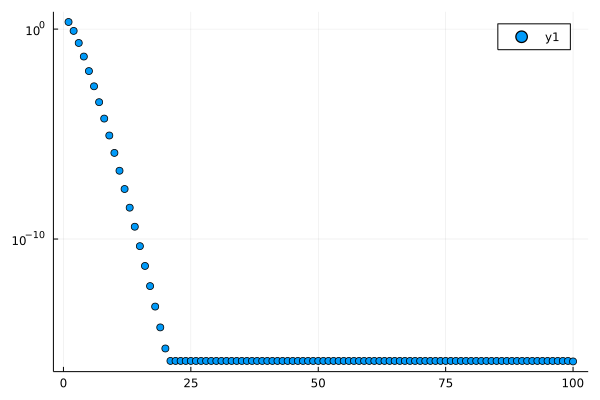

In [5]:
H = hilbertmatrix(100)
U,σ,V = svd(H)
scatter(σ; yscale=:log10)

Note numerically we typically do not get a exactly zero singular values so the rank is always
treated as $\min(m,n)$.
Because the singular values decay rapidly 
 we can approximate the matrix very well with a rank 20 matrix:

In [6]:
k = 20 # rank
Σ_k = Diagonal(σ[1:k])
U_k = U[:,1:k]
V_k = V[:,1:k]
norm(U_k * Σ_k * V_k' - H)

1.15531964884547e-15

Note that this can be viewed as a _compression_ algorithm: we have replaced a matrix with 
$100^2 = 10,000$ entries by two matrices and a vector with $4,000$ entries without losing
any information.
In the problem sheet we explore the usage of low rank approximation to smooth functions.



## 4. Condition numbers

We have seen that floating point arithmetic induces errors in computations, and that we can typically
bound the absolute errors to be proportional to $C ϵ_{\rm m}$. We want a way to bound the
effect of more complicated calculations like computing $A 𝐱$ or $A^{-1} 𝐲$ without having to deal with
the exact nature of floating point arithmetic. Here we consider only matrix-multiplication but will make a remark
about matrix inversion.

To justify what follows, we first observe that errors in implementing matrix-vector multiplication
can be captured by considering the multiplication to be exact on the wrong matrix: that is, `A*x`
(implemented with floating point) is precisely $A + δA$ where $δA$ has small norm, relative to $A$.
This is known as _backward error analysis_.



To discuss floating point errors we need to be precise which order the operations happened.
We will use the definition `mul(A,x)`, which denote ${\rm mul}(A, 𝐱)$. (Note that `mul_rows` actually
does the _exact_ same operations, just in a different order.) Note that each entry of the result is in fact a dot-product
of the corresponding rows so we first consider the error in the dot product  `dot(𝐱,𝐲)` as implemented in floating-point, 
which we denote ${\rm dot}(A,x)$.

We first need a helper proposition:

**Proposition** If $|ϵ_i| ≤ ϵ$ and $n ϵ < 1$, then
$$
\prod_{k=1}^n (1+ϵ_i) = 1+θ_n
$$
for some constant $θ_n$ satisfying $|θ_n| ≤ {n ϵ \over 1-nϵ}$.

The proof is left as an exercise (Hint: use induction).

**Lemma (dot product backward error)**
For $𝐱, 𝐲 ∈ ℝ^n$,
$$
{\rm dot}(𝐱, 𝐲) = (𝐱 + δ𝐱)^⊤ 𝐲
$$
where
$$
|δ𝐱| ≤  {n ϵ_{\rm m} \over 2-nϵ_{\rm m}} |𝐱 |,
$$
where $|𝐱 |$ means absolute-value of each entry.


**Proof**

Note that 
$$
\begin{align*}
{\rm dot}(𝐱, 𝐲) &= \{ [(x_1 ⊗ y_1) ⊕ (x_2 ⊗ y_2)] ⊕(x_3⊗ y_3)] ⊕⋯\}⊕(x_n ⊗ y_n) \\
  & = \{ [(x_1 y_1)(1+δ_1) + (x_2 y_2)(1+δ_2)](1+γ_2) +x_3 y_3(1+δ_3)](1+γ_3) + ⋯  +x_n y_n(1+δ_n) \}(1+γ_n) \\
  & = ∑_{j = 1}^n x_j y_j (1+δ_j) ∏_{k=j}^n (1 + γ_k) \\
  & = ∑_{j = 1}^n x_j y_j (1+θ_j)
\end{align*}
$$
where we denote the errors from multiplication as $δ_k$ and those from addition by $γ_k$ 
(with $γ_1 = 0$). Note that $θ_j$ each have at most $n$ terms each bounded by $ϵ_{\rm m}/2$,
Thus the previous proposition tells us
$$
|θ_j| ≤ {n ϵ_{\rm m} \over 2- nϵ_{\rm m}}.
$$
Thus
$$
δ𝐱 =  \begin{pmatrix} x_1 θ_n^1 \cr x_2 θ_n^2 \cr x_3 θ_{n-1} \cr \vdots \cr x_n θ_1\end{pmatrix}
$$
and the theorem follows from homogeneity:
$$
\| δ𝐱 \| ≤ {n ϵ_{\rm m} \over 2-nϵ_{\rm m}} \| 𝐱 \|
$$

∎

**Theorem (matrix-vector backward error)**
For $A ∈ ℝ^{m × n}$ and $𝐱 ∈ ℝ^n$ we have
$$
{\rm mul}(A, 𝐱) = (A + δA) 𝐱
$$
where
$$
|δA| ≤ {n ϵ_{\rm m} \over 2-nϵ_{\rm m}}  |A|.
$$
Therefore
$$
\begin{align*}
\|δA\|_1 &≤  {n ϵ_{\rm m} \over 2-nϵ_{\rm m}} \|A \|_1 \\
\|δA\|_2 &≤  {\sqrt{\min(m,n)} n ϵ_{\rm m} \over 2-nϵ_{\rm m}} \|A \|_2 \\
\|δA\|_∞ &≤  {n ϵ_{\rm m} \over 2-nϵ_{\rm m}} \|A \|_∞
\end{align*}
$$

**Proof**
The bound on $|δA|$ is implied by the previous lemma.
The $1$ and $∞$-norm follow since
$$
\|A\|_1 = \||A|\|_1 \hbox{ and } \|A\|_∞ = \||A|\|_∞
$$
This leaves the 2-norm example, which is a bit more challenging as there are matrices
$A$ such that $\|A\|_2 ≠ \| |A| \|_2$.
Instead we will prove the result by going through the Fröbenius norm and using:
$$
\|A \|_2 ≤ \|A\|_F ≤ \sqrt{r} \| A\|_2
$$
where $r$ is rank of $A$ (see PS5)
and $\|A\|_F = \| |A| \|_F$,
so we deduce:
$$
\begin{align*}
\|δA \|_2 &≤ \| δA\|F = \| |δA| \|F ≤ {n ϵ_{\rm m} \over 2-nϵ_{\rm m}} \| |A| \|_F \\
          &= {n ϵ_{\rm m} \over 2-nϵ_{\rm m}} \| A \|_F ≤ {\sqrt{r} n ϵ_{\rm m} \over 2-nϵ_{\rm m}}\| A \|_2 \\
          &≤ {\sqrt{\min(m,n)} n ϵ_{\rm m} \over 2-nϵ_{\rm m}} \|A \|_2
\end{align*}
$$

∎

So now we get to a mathematical question independent of floating point: 
can we bound the _relative error_ in approximating
$$
A 𝐱 ≈ (A + δA) 𝐱
$$
if we know a bound on $\|δA\|$?
It turns out we can in turns of the _condition number_ of the matrix:

**Definition (condition number)**
For a square matrix $A$, the _condition number_ (in $p$-norm) is
$$
κ_p(A) := \| A \|_p \| A^{-1} \|_p
$$
with the $2$-norm:
$$
κ_2(A) = {σ_1 \over σ_n}.
$$


**Theorem (relative-error for matrix-vector)**
The _worst-case_ relative error in $A 𝐱 ≈ (A + δA) 𝐱$ is
$$
{\| δA 𝐱 \| \over \| A 𝐱 \| } ≤ κ(A) ε
$$
if we have the relative pertubation error $\|δA\| = \|A \| ε$.

**Proof**
We can assume $A$ is invertible (as otherwise $κ(A) = ∞$). Denote $𝐲 = A 𝐱$ and we have
$$
{\|𝐱 \| \over \| A 𝐱 \|} = {\|A^{-1} 𝐲 \| \over \|𝐲 \|} ≤ \| A^{-1}\|
$$
Thus we have:
$$
{\| δA 𝐱 \| \over \| A 𝐱 \| } ≤ \| δA\| \|A^{-1}\| ≤ κ(A) {\|δA\| \over \|A \|}
$$

∎


Thus for floating point arithmetic we know the error is bounded by $κ(A) {n ϵ_{\rm m} \over 2-nϵ_{\rm m}}$.

If one uses QR to solve $A 𝐱 = 𝐲$ the condition number also gives a meaningful bound on the error. 
As we have already noted, there are some matrices where PLU decompositions introduce large errors, so
in that case well-conditioning is not a guarantee (but it still usually works).